<a href="https://colab.research.google.com/github/kartik-sethi/Brain-Tumor-Detection/blob/main/Code/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [ ]:
df = pd.read_csv('/content/car data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
df['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [ ]:
df.shape

(301, 9)

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [ ]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

Encoding the Categorical data

In [ ]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},'Seller_Type':{'Dealer':0,'Individual':1},'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,1,0,0,0
297,brio,2015,4.00,5.9,60000,0,0,0,0
298,city,2009,3.35,11.0,87934,0,0,0,0
299,city,2017,11.50,12.5,9000,1,0,0,0
300,brio,2016,5.30,5.9,5464,0,0,0,0


In [ ]:
x= df.drop(columns=['Car_Name','Selling_Price'],axis=1).values
y= df['Selling_Price'].values

In [ ]:
print(x)

[[2.0140e+03 5.5900e+00 2.7000e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0130e+03 9.5400e+00 4.3000e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0170e+03 9.8500e+00 6.9000e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [2.0090e+03 1.1000e+01 8.7934e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0170e+03 1.2500e+01 9.0000e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0160e+03 5.9000e+00 5.4640e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [ ]:
train_prediction= model.predict(x_train)


In [ ]:
error_score= metrics.r2_score(y_train,train_prediction)
print('r2 score',error_score)

r2 score 0.8838169193709796


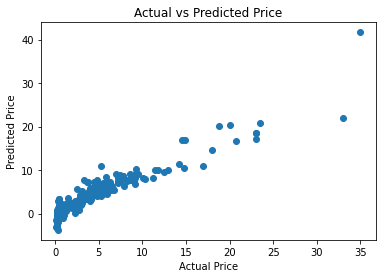

In [ ]:
plt.scatter(y_train,train_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

In [ ]:
test_prediction = model.predict(x_test)
error_score= metrics.r2_score(y_test,test_prediction)
print(error_score)

0.8401532365377697


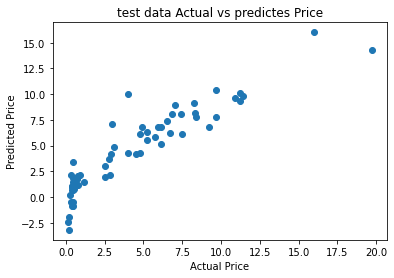

In [ ]:
plt.scatter(y_test,test_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('test data Actual vs predictes Price')
plt.show()

Lasso Regression

In [ ]:
#we use lasso regression and xgbregression when there are multiple columns having different correlation

In [ ]:
model= Lasso()

In [ ]:
model.fit(x_train,y_train)

Lasso()

In [ ]:
train_predict= model.predict(x_train)
print(metrics.r2_score(y_train,train_predict))

0.843587395258283


In [ ]:
test_predict= model.predict(x_test)
print(metrics.r2_score(y_test,test_predict))

0.8497457570738539


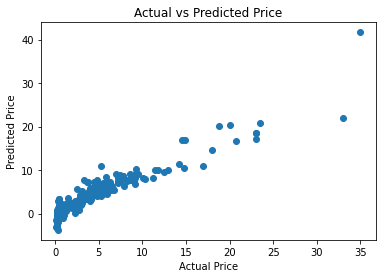

In [ ]:
plt.scatter(y_train,train_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

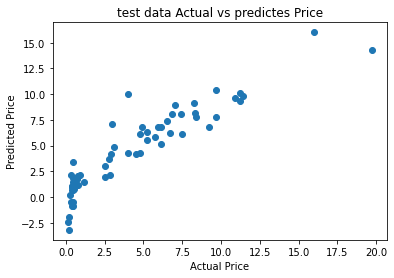

In [ ]:
plt.scatter(y_test,test_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('test data Actual vs predictes Price')
plt.show()